<a href="https://colab.research.google.com/github/Shafee0813/colab_work/blob/main/Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

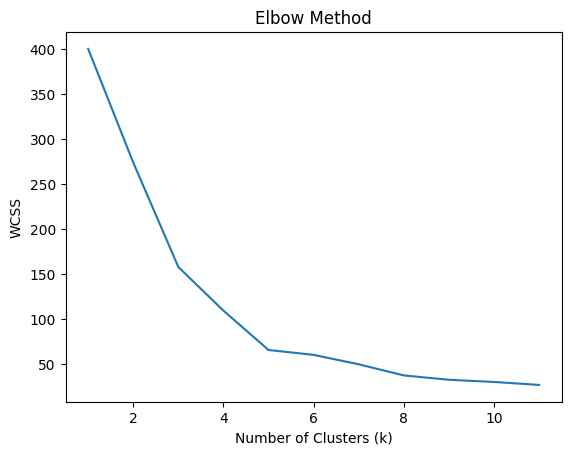

KeyError: 'Annual Income (k$)'

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/mall-customers-data.csv')

# Select features for clustering (e.g., Annual Income and Spending Score)
X = df[['annual_income', 'spending_score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for k = 1 to 11
wcss = []  # Within-cluster sum of squares
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal k value (e.g., using the Elbow Method)
# Let's assume k = 5 based on the Elbow Method

# Apply k-means with the chosen k value
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Visualize the clusters (e.g., scatter plot)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()